In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/blood_transfusion.csv')
print(df.head())

   Recency  Frequency  Monetary  Time        Class
0        2         50     12500    98      donated
1        0         13      3250    28      donated
2        1         16      4000    35      donated
3        2         20      5000    45      donated
4        1         24      6000    77  not donated


In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

In [4]:
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

In [6]:
clf = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('Classifier', KNeighborsClassifier(n_neighbors=5))
])

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
clf.fit(Xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Classifier', KNeighborsClassifier())])

In [9]:
ypred = clf.predict(Xtest)  

Accuracy: 0.7466666666666667
Precision: 0.7862595419847328
Recall: 0.911504424778761
F1 Score: 0.8442622950819673
[[  9  28]
 [ 10 103]]


<Axes: >

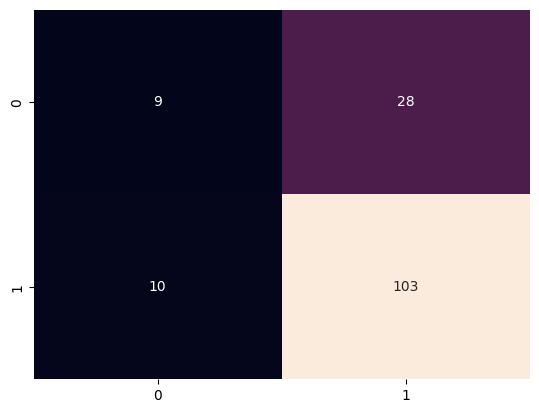

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Calculate metrics
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

#Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

#Confusion matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

#Visualize the confusion matrix
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
